In [40]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import kagglehub
from scipy.io import loadmat
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [30]:
path = kagglehub.dataset_download("avnishnish/mnist-original")
data_raw = loadmat(f"{path}/mnist-original.mat")
print(data_raw.keys())

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])


In [31]:
mnist = {
    'data':data_raw['data'].T,
    'target':data_raw['label'][0], #select first row of element
}

In [32]:
x,y = mnist['data'],mnist['target'],

#shuffle data
# shuffle=np.random.permutation(70000)
# x,y = x[shuffle],y[shuffle]
# X_train,x_test,Y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]
X_train,x_test,Y_train,y_test = train_test_split(mnist['data'],mnist['target'],random_state=0,shuffle=True)

In [33]:
print(X_train.shape,x_test.shape,Y_train.shape,y_test.shape)

(52500, 784) (17500, 784) (52500,) (17500,)


<function matplotlib.pyplot.show(close=None, block=None)>

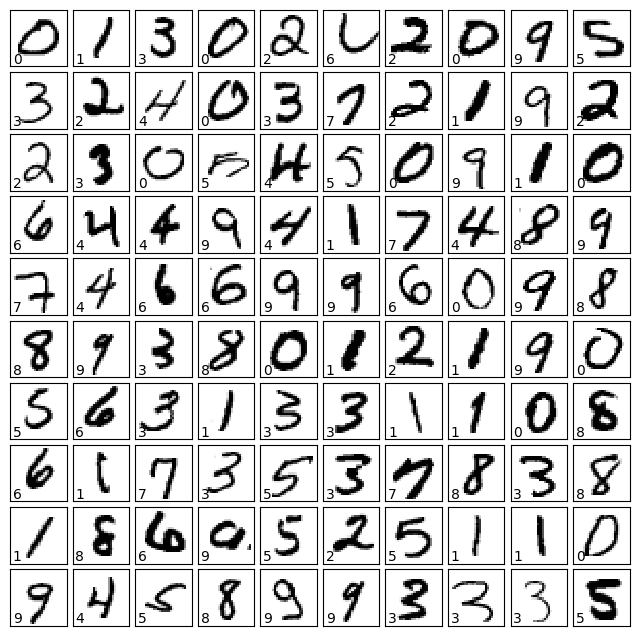

In [34]:
fig,ax = plt.subplots(10,10,
                     figsize=(8,8),
                     subplot_kw={'xticks':[],'yticks':[]},
                     gridspec_kw=dict(hspace=0.1,wspace=0.1)
                     )
#displau image data before training
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i].reshape(28,28),cmap='binary', interpolation='nearest')
    axi.text(0.05,0.05,str(int(Y_train[i])),transform=axi.transAxes,color="black")
plt.show

In [36]:
#create model
model = MLPClassifier()

In [37]:
model.fit(X_train,Y_train)

MLPClassifier()

In [38]:
y_pred = model.predict(x_test)

In [41]:
print('Accuracy Score :', accuracy_score(y_test,y_pred))

Accuracy Score : 0.9613142857142857


<function matplotlib.pyplot.show(close=None, block=None)>

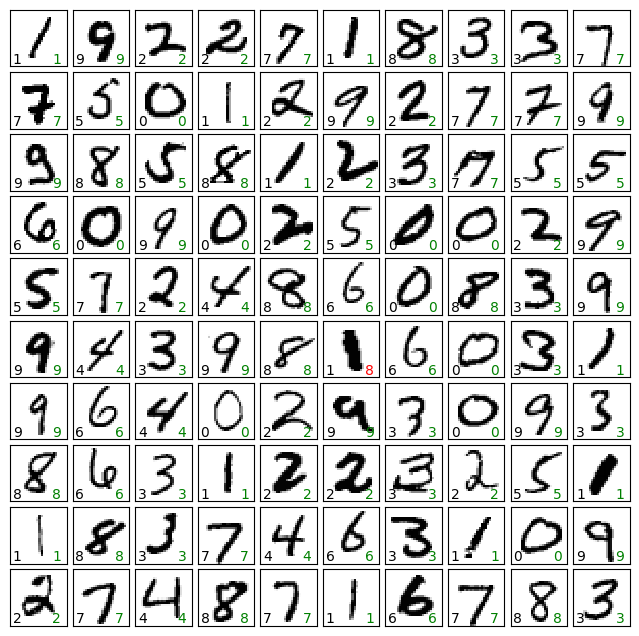

In [42]:
fig,ax = plt.subplots(10,10,
                     figsize=(8,8),
                     subplot_kw={'xticks':[],'yticks':[]},
                     gridspec_kw=dict(hspace=0.1,wspace=0.1)
                     )
#displau image data after training & prediction
for i, axi in enumerate(ax.flat):
    #display test image data
    axi.imshow(x_test[i].reshape(28,28),cmap='binary', interpolation='nearest')
    #display text true number image data
    axi.text(0.05,0.05,str(int(y_test[i])),transform=axi.transAxes,color="black")

    #display text predict number image data
    axi.text(0.75,0.05,str(int(y_pred[i])),transform=axi.transAxes,
    color="green" if y_pred[i] == y_test[i] else "red")
plt.show